In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral'
#plt.rcParams["figure.dpi"] = 1200

# Introduction to the Lomb-Scargle Periodogram

Notebook scaffolding and structure (e.g. function outlines and original problem statements) by AA Miller (Northwestern/CIERA)  
Functions "solved"/completed, and some structure modified, by Sameer Singh

**Problem 1a**

Create a function, `gen_periodic_data`, that creates simulated data (including noise) over a grid of user supplied positions:

$$ y = A\sin\left(\frac{2 \pi x}{P} - \phi\right) + \sigma_y$$

where $A, P, \phi$ are inputs to the function. `gen_periodic_data` should include Gaussian noise, $\sigma_y$, for each output $y_i$.

In [2]:
def gen_periodic_data(x, period=1, amplitude=1, phase=0, noise=0):
    '''Generate periodic data given the function inputs
    
    y = A*sin(2*pi*x/p - phase) + noise
    
    Parameters
    ----------
    x : array-like
        input values to evaluate the array
    
    period : float (default=1)
        period of the periodic signal
    
    amplitude : float (default=1)
        amplitude of the periodic signal
    
    phase : float (default=0)
        phase offset of the periodic signal
    
    noise : float (default=0)
        variance of the noise term added to the periodic signal
    
    Returns
    -------
    y : array-like
        Periodic signal evaluated at all points x
    '''
    
    y = amplitude * np.sin((2*np.pi*x)/period - phase)
    
    rng = np.random.default_rng()
    dy = noise * rng.standard_normal(len(x)) # noise is what we consider as "scale"
    
    return y + dy

**Problem 1b**

Generate a *noise-free* signal with $A = 2$ and $p = \pi$ over a regular grid between 0 and 10. Plot the results (and make sure `gen_periodic_data` behaves as you would expect).

Text(0.5, 1.0, '$y = 2 \\sin(2x)$')

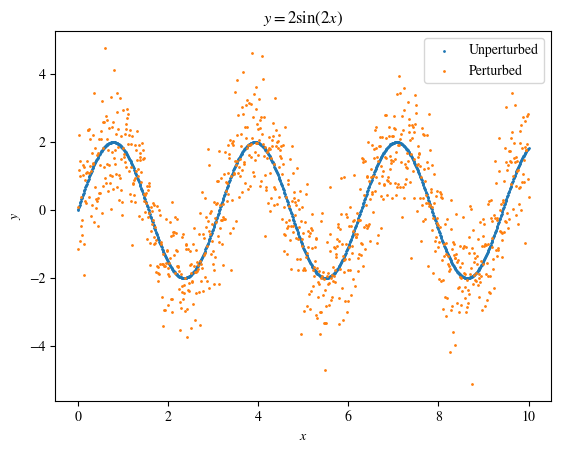

In [3]:
x = np.linspace(0, 10, 1000) 
y = gen_periodic_data(x, amplitude = 2, period = np.pi)
y_noisy = gen_periodic_data(x, amplitude = 2, period = np.pi, noise = 1)

fig, ax = plt.subplots()
ax.scatter(x, y, label="Unperturbed", s = 1)
ax.scatter(x, y_noisy, label="Perturbed", s = 1)
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title(r"$y = 2 \sin(2x)$")

**Problem 1c**

Create a function, `phase_plot`, that takes x, y, and $P$ as inputs to create a phase-folded light curve (i.e., plot the data at their respective phase values given the period $P$).

Include an optional argument, `y_unc`, to include uncertainties on the `y` values, when available.

In [4]:
def phase_plot(x, y, period, y_unc = 0.0):
    '''Create phase-folded plot of input data x, y
    
    Parameters
    ----------
    x : array-like
        data values along abscissa

    y : array-like
        data values along ordinate

    period : float
        period to fold the data
        
    y_unc : array-like
        uncertainty of the y 
    '''    
    phases = (x % period)/(period) * (2*np.pi)
    if type(y_unc) == float:
        y_unc = np.zeros_like(x)
        
    plot_order = np.argsort(phases)
    fig, ax = plt.subplots()
    ax.errorbar(phases[plot_order], y[plot_order], y_unc[plot_order],
                 fmt='o', mec="0.2", mew=0.1)
    ax.set_xlabel("Phase (Radians)")
    ax.set_ylabel("Signal")
    ax.set_title("Phase Folding")

**Problem 1d**

Plot the phase folded data generated in **1b**.

Does you plot match your expectations?

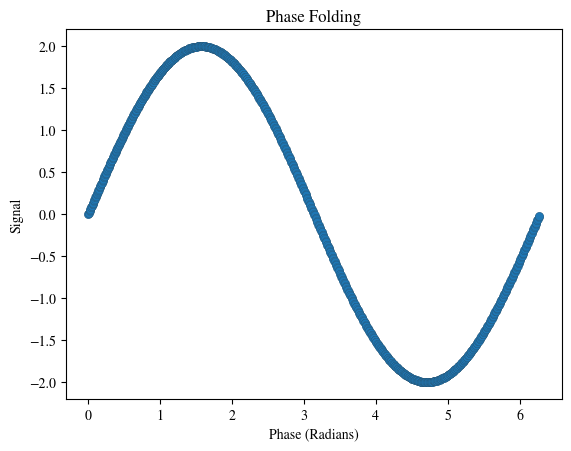

In [5]:
phase_plot(x, y, np.pi)

# Indeed it does. The data covers more than a full period of the sine wave, 
# so on a phase-folded plot, we should simply see a single progression over a full cycle, 
# swinging over the full range of the sine wave (what we can't show visually 
# but know mathematically is that the phase plot traces over itself, in this case 10/pi times.

**Problem 2a**

The Nyquist frequency limit gives that if observations are obtained in a uniformly spaced manner at a rate of $f_0 = 1/T$ one can only recover the frequncy information if the signal is band-limited between frequencies $\pm f_0/2$; alternatively, the highest frequency that can be detected in such data is $f_0/2$.

Generate and plot a periodic signal with $f = f_\mathrm{Ny} = 1/2$ on a grid from 0 to 10, comprising of 10 even samples (i.e., 0, 1, 2, 3, ..., 10). Overplot the underlying signal in addition to the observations.

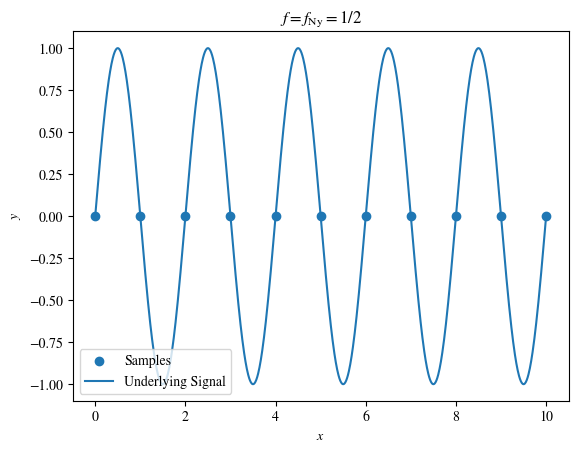

In [6]:
x = np.linspace(0, 10, 11) # 10 intervals means 11 points
y = gen_periodic_data(x, period = 2) 
x_signal = np.linspace(0, 10, 1000) 
y_signal = gen_periodic_data(x_signal, period = 2)
#y_signal_out_of_band_alias = gen_periodic_data(x_signal, period = 1/2.8)
fig, ax = plt.subplots()
ax.scatter(x, y, label = "Samples")
ax.plot(x_signal, y_signal, label = "Underlying Signal")
#ax.plot(x_signal, -y_signal_out_of_band_alias, linewidth = 0.2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("$f = f_{\mathrm{Ny}} = 1/2$")
ax.legend(loc="lower left")


**Problem 2b**

What happens at $f > f_\mathrm{Ny}$? As above, generate and plot a periodic signal with $f = 0.7$ on an even grid from 0 to 10. Overplot the underlying signal in addition to the observations.

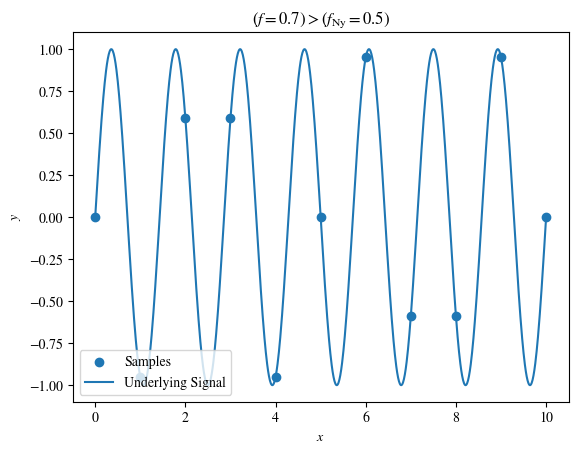

In [7]:
x = np.linspace(0, 10, 11)
y = gen_periodic_data(x, period = 1/0.7)
x_signal = np.linspace(0, 10, 1000)
y_signal = gen_periodic_data(x_signal, period = 1/0.7)
#y_signal_foo = -gen_periodic_data(x_signal, period = 1/3.3)
fig, ax = plt.subplots()
ax.scatter(x, y, label = "Samples")
ax.plot(x_signal, y_signal, label = "Underlying Signal")
#ax.plot(x_signal, y_signal_foo)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("$(f=0.7) > (f_{\mathrm{Ny}} =0.5)}$")
ax.legend(loc="lower left")

In [8]:
# here are some plots that I think make the point better

Text(0, 0.5, '$y$')

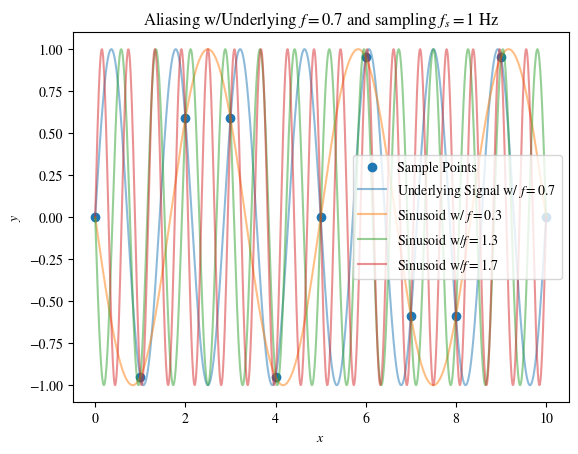

In [9]:
x_sample = np.linspace(0, 10, 11) # 1 Hz sampling rate --> Nyquist frequency = 0.5
y_at_sample_points = gen_periodic_data(x_sample, period = 1/0.7) # underlying frequency 0.7 < 0.5, can't resolve
x_signal = np.linspace(0, 10, 1000) # many points ~ continous
y_signal = gen_periodic_data(x_signal, period = 1/0.7)
y_fundamental_alias = -gen_periodic_data(x_signal, period = 1/0.3)
y_first_alias_after_point_7 = -gen_periodic_data(x_signal, period = 1/1.3)
y_second_alias_after_point_7 = gen_periodic_data(x_signal, period = 1/1.7)
fig, ax = plt.subplots()
ax.scatter(x_sample, y_at_sample_points, label = "Sample Points")
ax.plot(x_signal, y_signal, alpha = 0.5, label = "Underlying Signal w/ $f = 0.7$")
ax.plot(x_signal, y_fundamental_alias, alpha = 0.5, label = "Sinusoid w/ $f = 0.3$")
ax.plot(x_signal, y_first_alias_after_point_7, alpha = 0.5, label = "Sinusoid w/$f = 1.3$")
ax.plot(x_signal, y_second_alias_after_point_7, alpha = 0.5, label = "Sinusoid w/$f = 1.7$")
ax.legend()
ax.set_title("Aliasing w/Underlying $f = 0.7$ and sampling $f_s = 1$ Hz")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

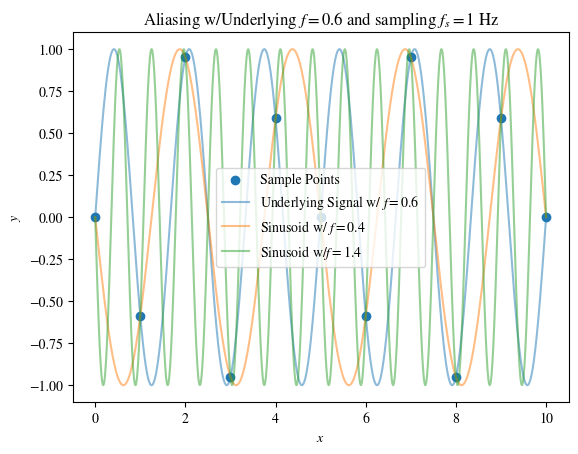

In [10]:
x_sample = np.linspace(0, 10, 11) # 1 Hz sampling rate --> Nyquist frequency = 0.5
y_at_sample_points = gen_periodic_data(x_sample, period = 1/0.6) # underlying frequency 0.7 < 0.5, can't resolve
x_signal = np.linspace(0, 10, 1000) # many points ~ continous
y_signal = gen_periodic_data(x_signal, period = 1/0.6)
y_fundamental_alias = -gen_periodic_data(x_signal, period = 1/0.4)
y_first_alias_after_point_6 = -gen_periodic_data(x_signal, period = 1/1.4)
#y_second_alias_after_point_7 = gen_periodic_data(x_signal, period = 1/1.7)
fig, ax = plt.subplots()
ax.scatter(x_sample, y_at_sample_points, label = "Sample Points")
ax.plot(x_signal, y_signal, alpha = 0.5, label = "Underlying Signal w/ $f = 0.6$")
ax.plot(x_signal, y_fundamental_alias, alpha = 0.5, label = "Sinusoid w/ $f = 0.4$")
ax.plot(x_signal, y_first_alias_after_point_6, alpha = 0.5, label = "Sinusoid w/$f = 1.4$")
#ax.plot(x_signal, y_second_alias_after_point_7, alpha = 0.5, label = "Sinusoid w/$f = 1.7$")
ax.set_title("Aliasing w/Underlying $f = 0.6$ and sampling $f_s = 1$ Hz")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

**Problem 2c**

Overplot a source with $f = 2.7$ on the same data shown in **2b**.

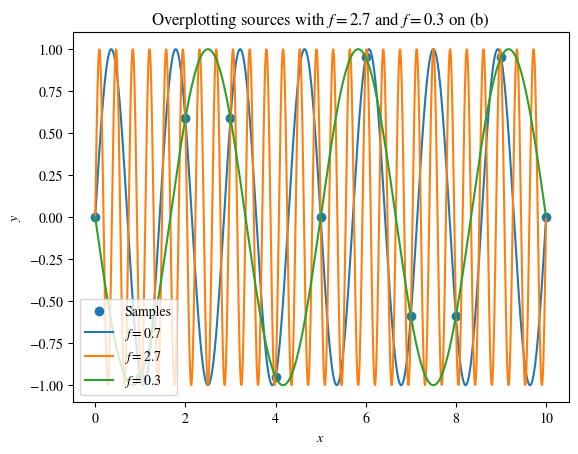

In [11]:
x = np.linspace(0, 10, 11)
y = gen_periodic_data(x, period = 1/0.7)
x_signal = np.linspace(0, 10, 1000)
y_signal_1 = gen_periodic_data(x_signal, period = 1/0.7)
y_signal_2 = gen_periodic_data(x_signal, period = 1/2.7)
y_signal_3 = gen_periodic_data(x_signal, period = 1/0.3)
fig, ax = plt.subplots()
ax.scatter(x, y, label = "Samples")
ax.plot(x_signal, y_signal_1, label = "$f=0.7$")
ax.plot(x_signal, y_signal_2, label = "$f = 2.7$")
ax.plot(x_signal, -y_signal_3, label = "$f = 0.3$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title(r"Overplotting sources with $f=2.7$ and $f=0.3$ on (b)")
ax.legend(loc="lower left")

**Problem 3a**

Write a function, `chi2`, to calculate the $\chi^2$ given $f$, $A_f$, and $\phi$, for observations $y_n$ with uncertainty $\sigma_{y,n}$ taken at times $t_n$.

*Hint* - store $A_f$ and $\phi$ in a single variable `theta`, where `a = theta[0]` and `phi = theta[1]` (for later)

In [12]:
def chi2(theta, y, y_unc, x, f):
    a = theta[0]
    phi = theta[1]
    
    running_chi2 = 0 
    
    for i in range(len(y)):
        
        contribution = (y[i] - (a * np.sin(2*np.pi*f*(x-phi)))/(y_unc[i]))**2
        running_chi2 += contribution
        
    return running_chi2

#actually, can't we do this faster with NumPy? there's no need to loop like this, since each term in the sum is at
# the same array index

def chi2(theta, y, y_unc, x, f):
    a = theta[0]
    phi = theta[1]
    
    model_predictions = np.sin(2*np.pi*f*(x-phi))
    chi_2 = np.sum(((y - model_predictions) / y_unc)**2)
        
    return chi_2

**Problem 3b**

Write a function to minimize the $\chi^2$ given everything but $A_f$ and $\phi_f$.

*Hint* - [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) within the `scipy` package is helpful.

In [13]:
from scipy.optimize import minimize

def min_chi2(theta, y, y_unc, x, f):
    # minimize function syntax: minimize(fun, x0, args=(), method=None...)
    # theta represents the unknown arguments w.r.t we are doing minimization
    # we give to args "everything else"
    res = minimize(chi2, theta, args=(y, y_unc, x, f))
    return res.fun
    #fun is an attribute of an OptimizeResult object -- it is the actual minimum value of chi^2 obtained

**Problem 3c**

Write a function, `ls_periodogram`, to calculate the LS periodogram for observations $y$, $\sigma_y$, $t$ over a frequency grid `f_grid`.

In [14]:
def ls_periodogram(y, y_unc, x, f_grid):
    psd = np.empty_like(f_grid) # to store the power spectral density at each frequency
    chi2_0 = np.sum(((y - np.mean(y))/y_unc)**2) # value for non-varying reference model
    for f_num, f in enumerate(f_grid):
        psd[f_num] = 0.5*(chi2_0 - min_chi2([0,0], y, y_unc, x, f)) 
    
    return psd

**Problem 3d**

Generate a periodic signal with 100 observations taken at random intervals over a time period of 10 days. Use an input period of 5.25, amplitude of 7.4, and variance of the noise = 0.8. Then compute and plot the periodogram for the simulated data. Do you recover the simulated period?

*Hint* - set the minimum frequency in the grid to $1/T$ where $T$ is the duration of the observations. Set the maximum frequency to 10, and use an equally spaced grid with 50 points. 

In [15]:
rng = np.random.default_rng()
# calculate the periodogram

x = rng.uniform(0, 10, 100)
y = gen_periodic_data(x, period=5.25, amplitude=7.4, noise=0.8)
y_unc = np.ones_like(x)*np.sqrt(0.8)

f_grid = np.linspace(1/10, 10, 50)

psd_ls = ls_periodogram(y, y_unc, x, f_grid)

Text(0.5, 1.0, 'Simulated Time-Series Data with underlying $T = 5.25$')

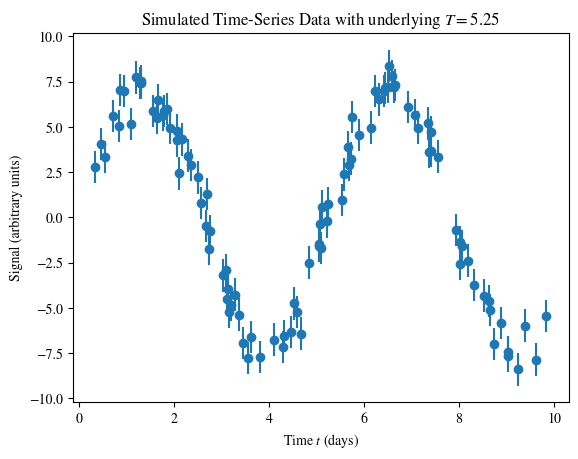

In [16]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr = y_unc, fmt = "o")
ax.set_xlabel("Time $t$ (days)")
ax.set_ylabel("Signal (arbitrary units)")
ax.set_title("Simulated Time-Series Data with underlying $T = 5.25$")

Text(0.5, 1.0, 'Undersampled Periodogram')

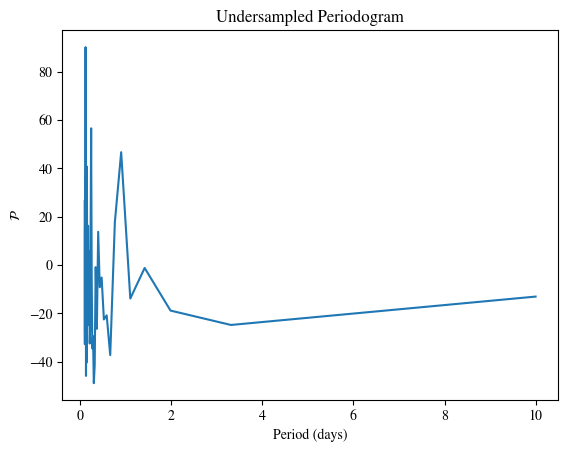

In [17]:
# plot the periodogram
fig, ax = plt.subplots()
ax.plot(1/f_grid, psd_ls)
ax.set_ylabel('$\mathcal{P}$')
ax.set_xlabel('Period (days)')
ax.set_title("Undersampled Periodogram")

**Problem 3e**

For the same data, include 1000 points in `f_grid` and calculate and plot the periodogram. 

Now do you recover the correct period?

In [18]:
# calculate the periodogram
f_grid = np.linspace(1/10, 10, 1195) # the 1195 calculation is down below a few cells, under the rubin one

psd_ls = ls_periodogram(y, y_unc, x, f_grid)

The best fit period is: 5.2299605781865965


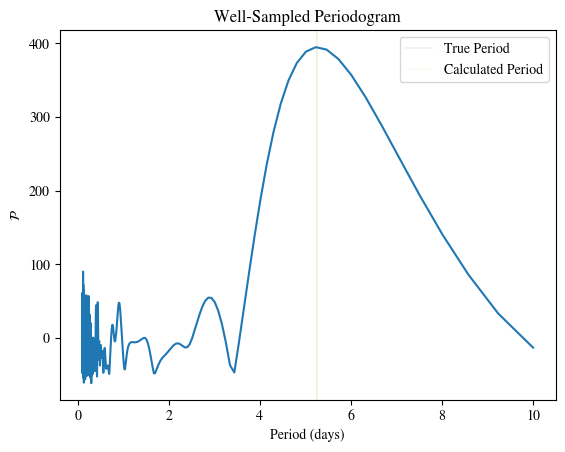

In [19]:
# plot the periodogram
fig, ax = plt.subplots()
ax.plot(1/f_grid, psd_ls) 
ax.set_ylabel('$\mathcal{P}$')
ax.set_xlabel('Period (days)')
ax.set_title("Well-Sampled Periodogram")
ax.axvline(x=5.25, label = "True Period", linewidth = 0.1, color = "green")
ax.axvline(x=1/f_grid[np.argmax(psd_ls)], label = "Calculated Period", linewidth = 0.1, linestyle = "--", color = "orange")
ax.legend()
print(f"The best fit period is: {1/f_grid[np.argmax(psd_ls)]}")

**Problem 3f**

Plot the phase-folded data at the newly found "best" fit period.

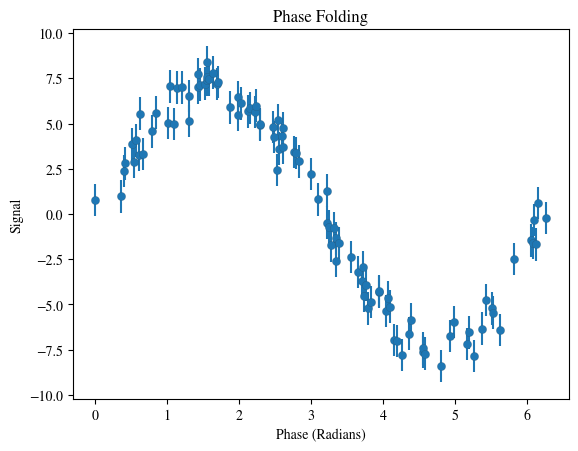

In [20]:
phase_plot(x, y, 1/f_grid[np.argmax(psd_ls)], y_unc)

**Problem 3g**

Calculate the optimal frequency grid for Rubin light curves. Assume time is measured in days, a survey duration of 10 years and that the observations cannot recover periods less than 1 hr. 

What is the size of this frequency grid?

In [21]:
f_min =  1/(365*10)# variation on the scale of the whole observing window
f_max = 1/(1/24) # i.e. the fastest variation we'd expect to see on the data (once an hour, 24 hours a day)
delta_f = 1/(5*(1/f_min)) # sample proportional to 1/T, choose 5 as our oversampling factor (standard)

f_grid = np.arange(f_min, f_max, delta_f)

print(f"{len(f_grid)} grid points are needed to sample the periodogram")

437996 grid points are needed to sample the periodogram


In [22]:
f_min = 1/(10)
f_max = 1/(1/24)
delta_f = 1/(5*(1/f_min)) 
f_grid = np.arange(f_min, f_max, delta_f)
print(f"{len(f_grid)} grid points are needed to sample the periodogram")

1195 grid points are needed to sample the periodogram
